In [2]:
import numpy as np, matplotlib as mpl, matplotlib.pyplot as plt, urllib, os
import scipy.ndimage
import imageio 
import urllib.request
import math

#base_url = 'https://web.eecs.umich.edu/~ahowens/eecs442/fa23/psets/ps1/ims'
base_url = 'https://andrewowens.com/eecs442-fa23-mirror/ims'
for name in ['dog-1.jpg', 'dog-2.jpg', 'apple.jpg']:
  with open(name, 'wb') as out:
    url = os.path.join(base_url, name)
    out.write(urllib.request.urlopen(url).read())


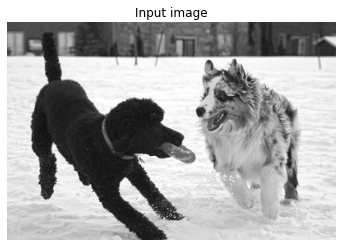

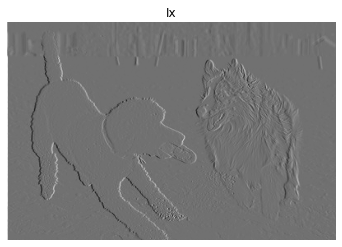

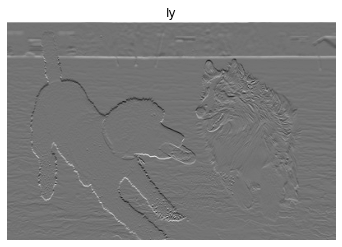

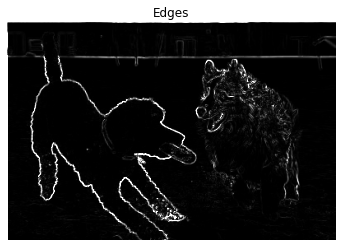

In [4]:

im = imageio.imread('dog-1.jpg')
im = im.mean(2)/255. 

dx = np.array([[1,-1]])
dy = np.array([[1],[-1]])

def cellOf(im, h, m, n):
    sum = 0
    for i in range(h.shape[1]):
        for k in range(h.shape[0]):
            sum += (h[k][i] * im[m - k][n - i]) if (m - k >= 0 and n - i >= 0)  else 0
    return sum

# convolve 2d image im with 2d filter h
def convolve(im, h):
    ans = np.zeros(im.shape)
    for y in range(im.shape[1]):
        for x in range(im.shape[0]):
            ans[x][y] = cellOf(im, h, x, y)
           
    return ans
            
   
# Convolve the image with horizontal and vertical gradient filters
Ix = convolve(im, dx)
Iy = convolve(im, dy)
edges = Ix**2. + Iy**2.

# Visualize edge maps using matplotlib
plt.figure()
plt.title('Input image')
plt.axis('off')
plt.imshow(im, cmap = 'gray', vmin = 0, vmax = 1)

plt.figure()
plt.axis('off')
plt.title('Ix')
plt.imshow(Ix, cmap = 'gray')

plt.figure()
plt.title('Iy')
plt.axis('off')
plt.imshow(Iy, cmap = 'gray')

plt.figure()
plt.title('Edges')
plt.axis('off')
plt.imshow(edges, cmap = 'gray', vmin = 0., vmax = np.percentile(edges, 99))


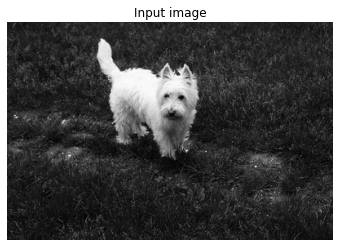

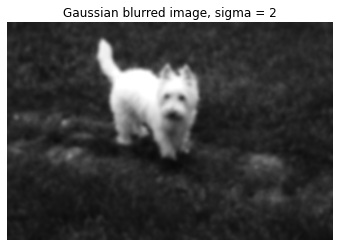

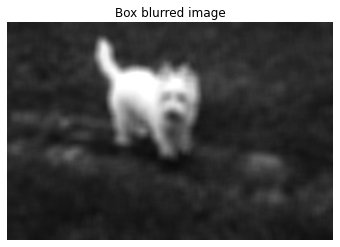

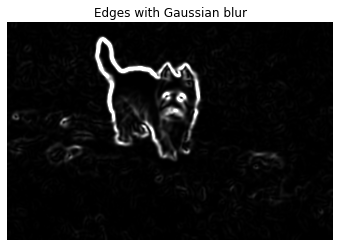

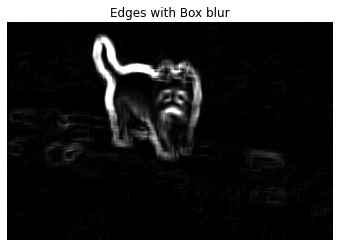

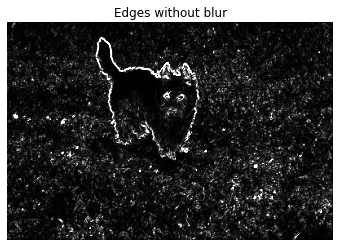

In [5]:
im = imageio.imread('dog-2.jpg').mean(2)/255.

#unblurred

Ix = scipy.ndimage.convolve(im, dx)
Iy = scipy.ndimage.convolve(im, dy)
edges = Ix**2. + Iy**2.

'''
plt.figure()
plt.axis('off')
plt.title('Ix')
plt.imshow(Ix, cmap = 'gray' )

plt.figure()
plt.title('Iy')
plt.axis('off')
plt.imshow(Iy, cmap = 'gray' )
'''
plt.figure()
plt.title('Input image')
plt.axis('off')
plt.imshow(im, cmap = 'gray', vmin = 0, vmax = 1)

# 11x11 gaussian with st dev = 2
sigma = 2
G = np.zeros((11,11))
for row in range(11):
    for col in range(11):
        G[row][col] = (1/(2 * np.pi * sigma**2)) * np.e ** -(((row - (11/2))**2 + (col - (11/2))**2) / (2 * sigma**2))

# normalize
G = G / np.sum(G)

# convolve with gaussian
im_gaussian_blurred = scipy.ndimage.convolve(im, G)

plt.figure()
plt.title('Gaussian blurred image, sigma = 2')
plt.axis('off')
plt.imshow(im_gaussian_blurred, cmap = 'gray', vmin = 0, vmax = np.percentile(im_gaussian_blurred, 99))


#box filter
box = np.ones((11,11))
box = box / 11**2

# convolve with box filter
im_box_blurred = scipy.ndimage.convolve(im, box)

plt.figure()
plt.title('Box blurred image')
plt.axis('off')
plt.imshow(im_box_blurred, cmap = 'gray', vmin = 0, vmax = np.percentile(im_box_blurred, 99))

edges_gaussian = scipy.ndimage.convolve(im_gaussian_blurred, dx)**2. + scipy.ndimage.convolve(im_gaussian_blurred, dy)**2.
edges_box = scipy.ndimage.convolve(im_box_blurred, dx)**2. + scipy.ndimage.convolve(im_box_blurred, dy)**2.

plt.figure()
plt.title('Edges with Gaussian blur')
plt.axis('off')
plt.imshow(edges_gaussian, cmap = 'gray', vmin = 0., vmax = np.percentile(edges_gaussian, 99))

plt.figure()
plt.title('Edges with Box blur')
plt.axis('off')
plt.imshow(edges_box, cmap = 'gray', vmin = 0., vmax = np.percentile(edges_box, 99))

plt.figure()
plt.title('Edges without blur')
plt.axis('off')
plt.imshow(edges, cmap = 'gray', vmin = 0., vmax = np.percentile(edges, 99))


6.472408869095175
0.0023983935952096394


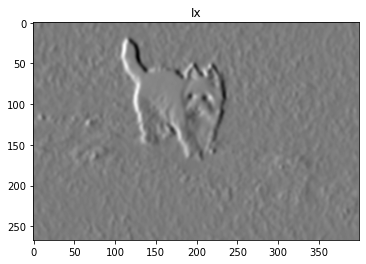

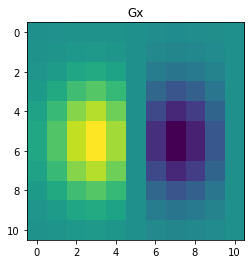

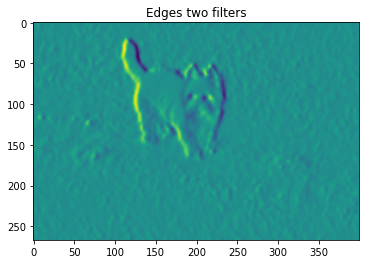

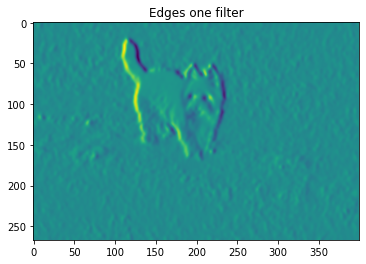

In [6]:

# Gaus blur filter
# G is gaus st dev = 2
Gx = scipy.ndimage.convolve(G, dx)
Ix = scipy.ndimage.convolve(im, Gx)
Gx = scipy.ndimage.convolve(G, dx)

plt.figure()
plt.title('Ix')
plt.imshow(Ix, cmap = 'gray' )

im_blur = scipy.ndimage.convolve(im, G)

plt.figure()
plt.title('Gx')
plt.imshow(Gx)

plt.figure()
plt.title('Edges two filters')
Ix = scipy.ndimage.convolve(im_blur, dx)
plt.imshow(Ix)

plt.figure()
plt.title('Edges one filter')
plt.imshow(scipy.ndimage.convolve(im, Gx))

print(np.abs(np.sum(im_blur - im)))

print(np.abs(scipy.ndimage.convolve(im_blur, dx)[15:-15,15:-15] - scipy.ndimage.convolve(im, Gx)[15:-15,15:-15]).mean())

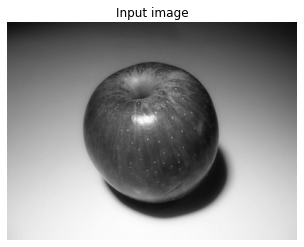

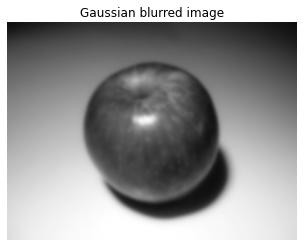

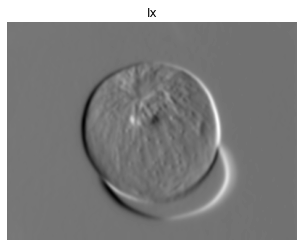

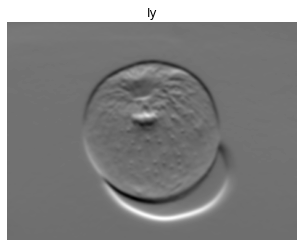

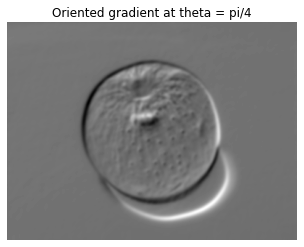

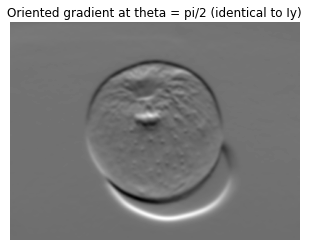

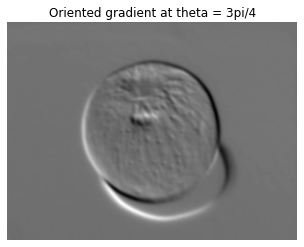

In [7]:
im = imageio.imread('apple.jpg').mean(2)/255.

dx = np.array([[1,-1]])
dy = np.array([[1],[-1]])

# input image
plt.figure()
plt.title('Input image')
plt.axis('off')
plt.imshow(im, cmap = 'gray', vmin = 0, vmax = 1)

# 11x11 gaussian with st dev = 2
sigma = 2
G = np.zeros((11,11))
for row in range(11):
    for col in range(11):
        G[row][col] = (1/(2 * np.pi * sigma**2)) * np.e ** -(((row - (11/2))**2 + (col - (11/2))**2) / (2 * sigma**2))
G = G / np.sum(G)

# blurred input
im_gaussian_blurred = scipy.ndimage.convolve(im, G)
plt.figure()
plt.title('Gaussian blurred image')
plt.axis('off')
plt.imshow(im_gaussian_blurred, cmap = 'gray', vmin = 0, vmax = np.percentile(im_gaussian_blurred, 99))

# Ix
Ix = scipy.ndimage.convolve(im_gaussian_blurred, dx)
plt.figure()
plt.title('Ix')
plt.axis('off')
plt.imshow(Ix, cmap = 'gray')

# Iy
Iy = scipy.ndimage.convolve(im_gaussian_blurred, dy)
plt.figure()
plt.title('Iy')
plt.axis('off')
plt.imshow(Iy, cmap = 'gray')

def oriented_grad(Ix, Iy, theta):
    ux = np.cos(theta)
    uy = np.sin(theta)
    return Ix * ux + Iy * uy

# gradient at different angles

# display oriented gradient at theta = pi/4
theta = math.pi / 4 
plt.figure()
plt.title('Oriented gradient at theta = pi/4')
plt.axis('off')
plt.imshow(oriented_grad(Ix, Iy, theta), cmap = 'gray')

# display oriented gradient at theta = pi/2
theta = math.pi / 2
plt.figure()
plt.title('Oriented gradient at theta = pi/2 (identical to Iy)')
plt.axis('off')
plt.imshow(oriented_grad(Ix, Iy, theta), cmap = 'gray')

# display oriented gradient at theta = 3pi/4
theta = 3 * math.pi / 4
plt.figure()
plt.title('Oriented gradient at theta = 3pi/4')
plt.axis('off')
plt.imshow(oriented_grad(Ix, Iy, theta), cmap = 'gray')


######################### End solution code #########################